In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe=pd.read_csv("heart.csv")
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

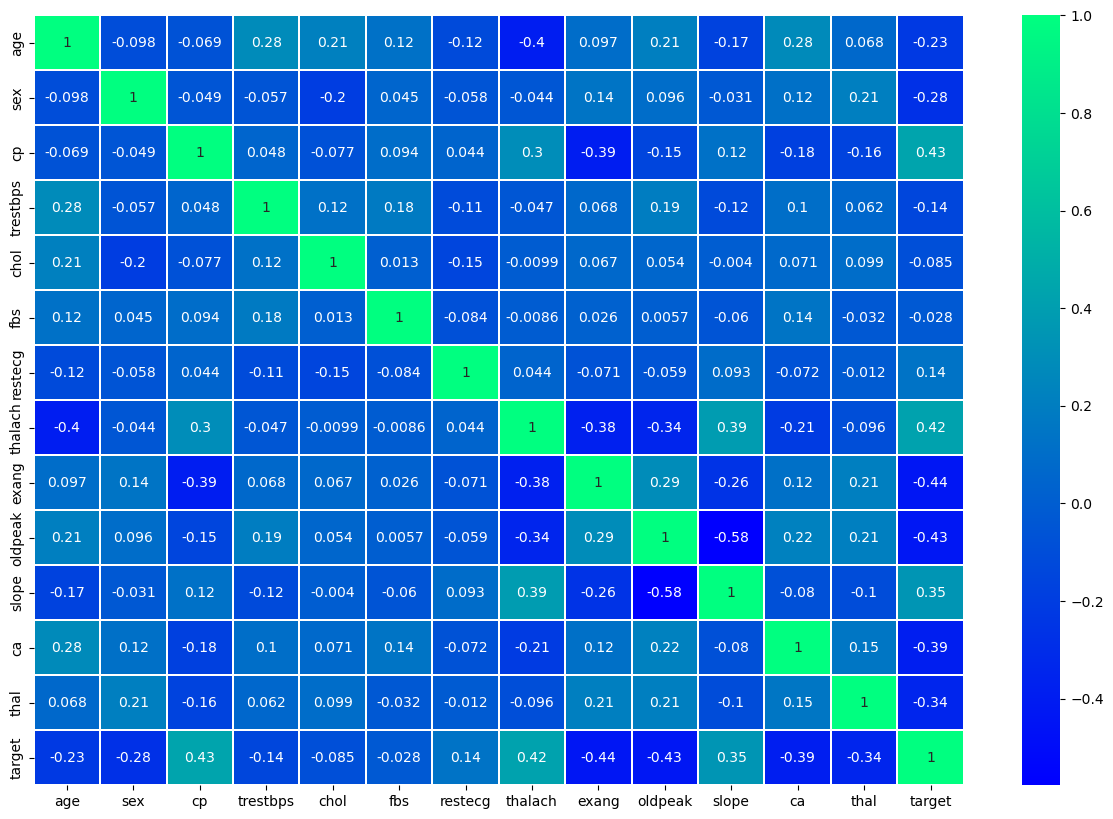

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True, cmap="winter")
plt.show()
plt.savefig('Correlationfigure')

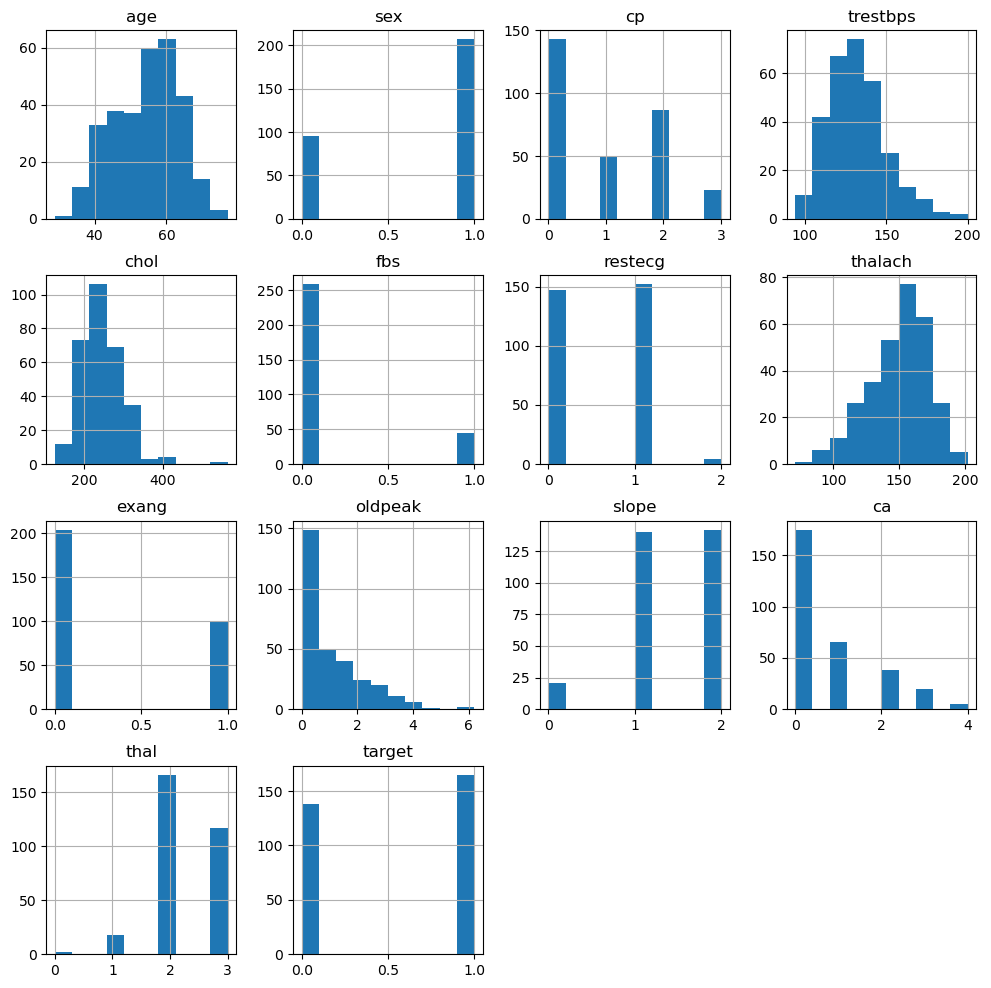

In [6]:
dataframe.hist(figsize=(12,12))
plt.savefig('featuresplot')

In [7]:
X=dataframe.drop(['target'],axis=1)
y=dataframe['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state= 40)

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        34
           1       0.89      0.74      0.81        42

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.82      0.80      0.80        76

Testing accuracy: 0.8026315789473685
Testing sensitivity or Recall: 0.7317073170731707
Testing specificity: 0.8857142857142857
Testing precision: 0.8823529411764706


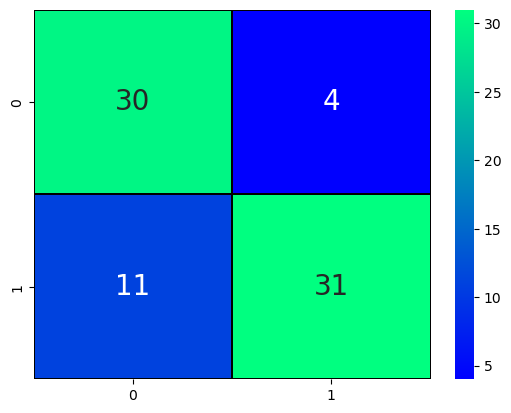

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
tree_model=DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores=cross_val_score(tree_model,X,y,cv=10,scoring='accuracy')
m=tree_model.fit(X_train,y_train)
prediction=m.predict(X_test)
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,cmap='winter',linewidths=0.3,linecolor='Black',annot_kws={"size":20})
print(classification_report(y_test,prediction))
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing accuracy:',(TP+TN)/(TP+TN+FN+FP))
print('Testing sensitivity or Recall:',TP/(TP+FN))
print('Testing specificity:',TN/(TN+FP))
print('Testing precision:',TP/(TP+FP))

In [12]:
input=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1):
    print("Patient has heart disease")
else:
    print("Patient is healthy")

Patient has heart disease


In [13]:
print(dataframe.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [14]:
input=(44,1,0,120,169,0,1,144,1,2.8,0,0,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1):
    print("Patient has heart disease")
else:
    print("Patient is healthy")

Patient is healthy


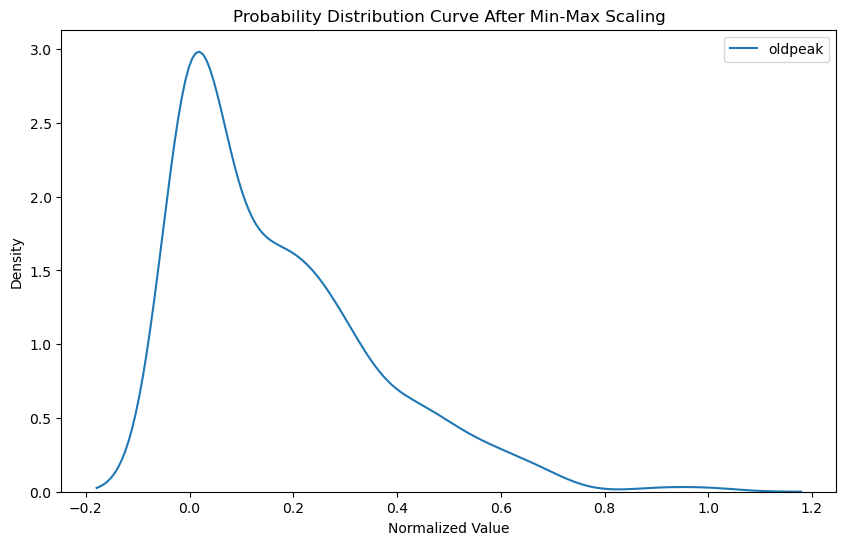

In [35]:
scaled_df = (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min())
plt.figure(figsize=(10, 6))
col="oldpeak"
sns.kdeplot(scaled_df[col], label=col)

plt.title('Probability Distribution Curve After Min-Max Scaling')
plt.xlabel('Normalized Value')
plt.ylabel('Density')
plt.legend()
plt.show()

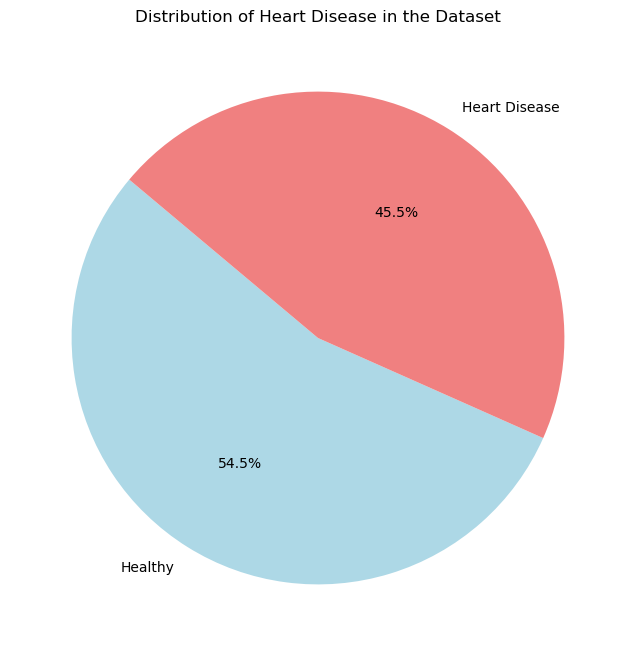

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Count the occurrences of each target value
target_counts = dataframe['target'].value_counts()

# Define labels and colors for the pie chart
labels = ['Healthy', 'Heart Disease']
colors = ['lightblue', 'lightcoral']

# Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(target_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Heart Disease in the Dataset')
plt.show()


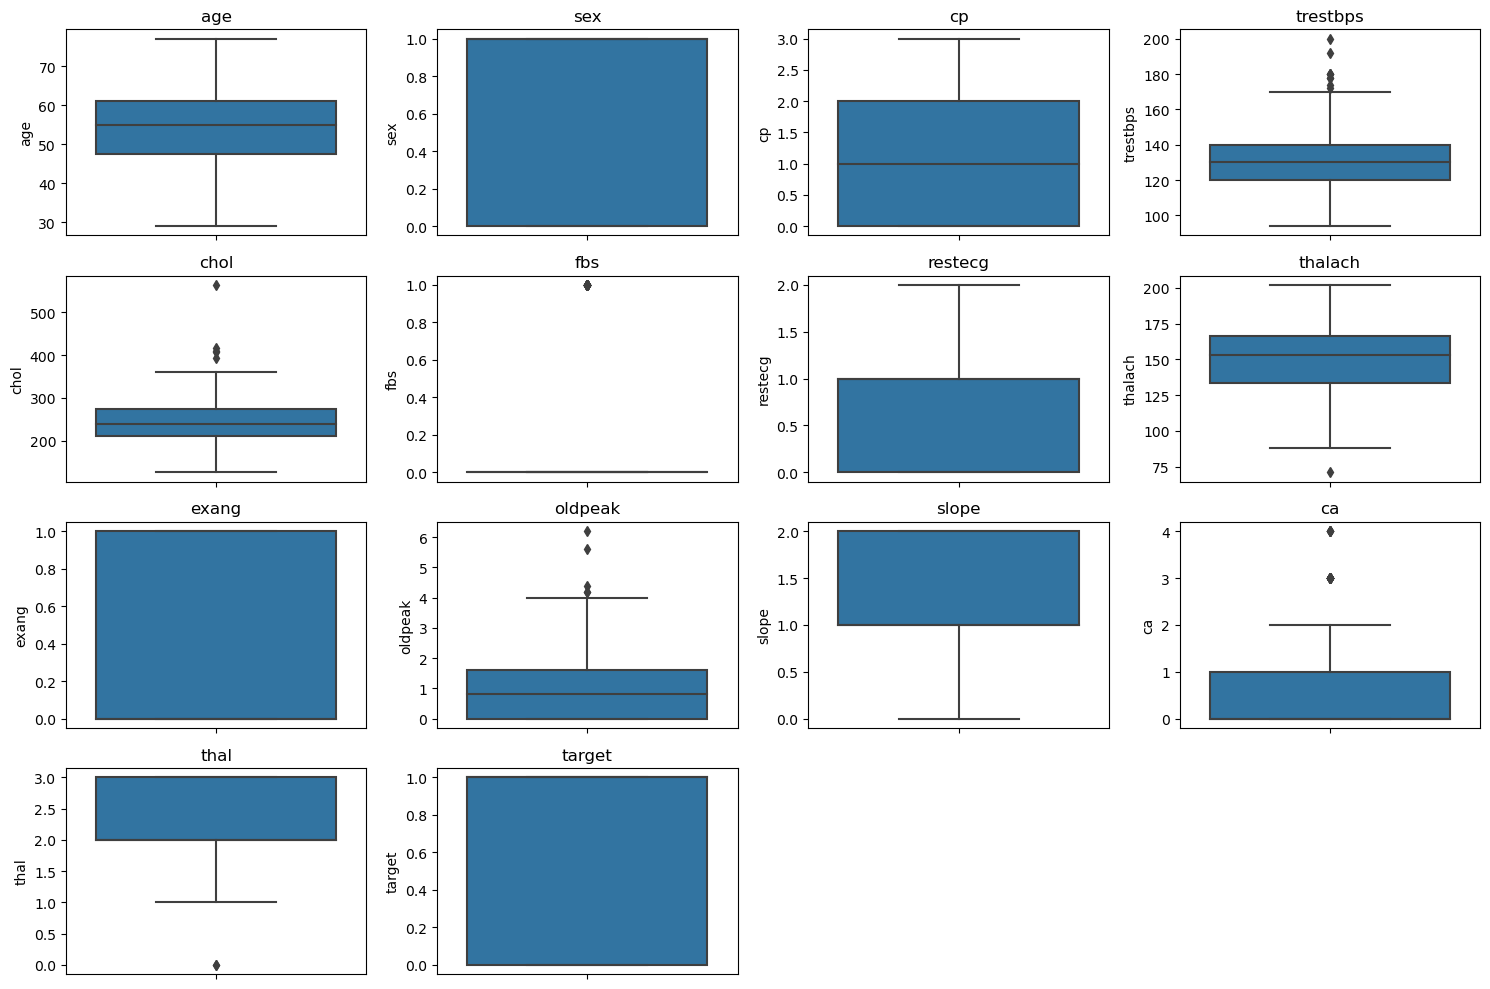

<Figure size 640x480 with 0 Axes>

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns = dataframe.columns

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create box plots for each feature
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)  # 4x4 grid for 13 plots
    sns.boxplot(y=dataframe[column])
    plt.title(column)

plt.tight_layout()
plt.show()
plt.savefig('boxplots')


In [ ]:
# Import necessary libraries
import seaborn as sns

# Create pairplot
sns.pairplot(dataframe, hue='target', diag_kind='kde')
plt.savefig('pairplot')
plt.show()

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot for target variable
sns.countplot(x='target', data=dataframe)
plt.title('Distribution of Target Variable')
plt.savefig('countplot_target')
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = tree_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc_curve')
plt.show()
